# Problem Set 1: Analysis of racial disparities in felony sentencing
Ryan Dudak \
Last Updated: 9/24/2023

# 0. Load packages and imports

In [1]:
## basic functionality
import pandas as pd
import numpy as np
import re

## can add others if you need them
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as dates

## repeated printouts
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## 0.1: Load the data (0 points)

Load the `sentencing_asof0405.csv` data

*Notes*: You may receive a warning about mixed data types upon import; feel free to ignore

In [2]:
df = sentencing = pd.read_csv("pset1_inputdata/sentencing_asof0405.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (10,11,14,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## 0.2: Print head, dimensions, info (0 points)

In [3]:
# Print Head
df.head(20)

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_CITY,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY
0,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510112469,116304211997,FIRST DEGREE MURDER,2,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
1,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50510213021,98265074680,HOME INVASION,14,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
2,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516447217,131972895911,FIRST DEGREE MURDER,4,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
3,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516497493,131966356472,FIRST DEGREE MURDER,5,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
4,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
5,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516648320,98059642859,HOME INVASION,13,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
6,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516698596,112267602827,ARMED ROBBERY,15,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
7,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516698596,112267602827,ARMED ROBBERY,15,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
8,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,False,50516748872,112265921257,ARMED ROBBERY,16,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,NaN,8/9/1984 12:00:00 AM,NaN,CHICAGO POLICE DEPT,NaN,8/15/1984 12:00:00 AM,08/15/1984 12:00:00 AM,Charge(S) Approved,9/21/1984 12:00:00 AM,Homicide


In [4]:
# Print Dimensions
df.shape

(248146, 41)

In [5]:
# Print Info
df.info

<bound method DataFrame.info of              CASE_ID  CASE_PARTICIPANT_ID          RECEIVED_DATE  \
0       149765331439         175691153649  8/15/1984 12:00:00 AM   
1       149765331439         175691153649  8/15/1984 12:00:00 AM   
2       149765331439         175691153649  8/15/1984 12:00:00 AM   
3       149765331439         175691153649  8/15/1984 12:00:00 AM   
4       149765331439         175691153649  8/15/1984 12:00:00 AM   
...              ...                  ...                    ...   
248141  445516248775         905289187184   2/3/2021 12:00:00 AM   
248142  445527409730         905322500577   2/4/2021 12:00:00 AM   
248143  445587767000         905518794790   2/9/2021 12:00:00 AM   
248144  445592613204         905533705601   2/9/2021 12:00:00 AM   
248145  445593200623         905535215556   2/9/2021 12:00:00 AM   

                                 OFFENSE_CATEGORY  PRIMARY_CHARGE_FLAG  \
0                               PROMIS Conversion                False   
1  

# Part one: data cleaning/interpretation

## 1.1: Understanding the unit of analysis (5 points)

- Print the number of unique values for the following columns. Do so in a way that avoids copying/pasting code for 
the three:

    - Cases (`CASE_ID`)
    - People in that case (`CASE_PARTICIPANT_ID`)
    - Charges (`CHARGE_ID`)

- Write a couple sentences on the following and show an example of each (e.g., a case involving multiple people):
    
    - Why there are more unique people than unique cases?
    - Why there are more unique charges than unique people?

- Print the mean and median number of charges per case/participant 

- Print the mean and median number of participants per case

- Does the data seem to enable us to follow the same defendant across different cases they're charged in? Write 1 sentence in support of your conclusion.


In [6]:
df[["CASE_ID", "CASE_PARTICIPANT_ID", "CHARGE_ID"]].nunique()

CASE_ID                197519
CASE_PARTICIPANT_ID    211977
CHARGE_ID              229015
dtype: int64

**Why there are more unique people than unique cases?** \
There are more unique people than cases because it is possible that multiple people are involved in a single case. For example, a robbery may be committed by a team of four people. \
\
**Why there are more unique charges than unique people?** \
There are more unique charges than unique people because a single person can be charged with multiple crimes. For example, someone involved in an armed robbery may be charged with armed robbery and assault.

In [7]:
# Mean and median charges per case and participant
df.groupby(["CASE_ID", "CASE_PARTICIPANT_ID"])["CHARGE_COUNT"].agg(["mean", "median"])

,,mean,median
CASE_ID,CASE_PARTICIPANT_ID,,
149765331439,175691153649,9.000000,13.0
150065796098,162105612284,3.333333,3.0
154524891354,179486992996,2.000000,2.0
154954734978,225758446387,1.000000,1.0
155222744754,217349881776,1.000000,1.0
...,...,...,...
445516248775,905289187184,1.000000,1.0
445527409730,905322500577,1.000000,1.0
445587767000,905518794790,1.000000,1.0


In [8]:
# Mean and median number of participants per case
df.groupby("CASE_ID")["CASE_PARTICIPANT_ID"].nunique().agg(["mean", "median"])

mean      1.073198
median    1.000000
Name: CASE_PARTICIPANT_ID, dtype: float64

**Does the data seem to enable us to follow the same defendant across different cases they're charged in?** \
The data does not currently allow us to follow the same defendant accross different cases, as rows are organized in such a way that each row contains a single offense for a single person in a single case, separating observations of people across cases.

## 1.2.1: Which offense is final? (3 points)

- First, read the data documentation [link](https://datacatalog.cookcountyil.gov/api/views/tg8v-tm6u/files/8597cdda-f7e1-44d1-b0ce-0a4e43f8c980?download=true&filename=CCSAO%20Data%20Glossary.pdf) and summarize in your own words the differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY` 

- Construct an indicator `is_changed_offense` that's True for case-participant-charge observations (rows) where there's a difference between the original charge (offense category) and the most current charge (updated offense category). What are some of the more common changed offenses? (can just print result of sort_values based on original offense category)

- Print one example of a changed offense from one of these categories and comment on what the reason may be


**differences between `OFFENSE_CATEGORY` and `UPDATED_OFFENSE_CATEGORY`** \
The `OFFENSE_CATEGORY` represents the broad offense category before specific charges are filed on a case, while the `UPDATED_OFFENSE_CATEGORY` denotes the Offense category for the case updated based upon the primary charge. The `OFFENSE_CATEGORY` may differ from the `UPDATED_OFFENSE_CATEGORY` because cases may evolve from intake to sentencing.

In [9]:
# Construct the is_changed_offense indicator
df["is_changed_offense"] = df.OFFENSE_CATEGORY != df.UPDATED_OFFENSE_CATEGORY

# Print result of sort_values 
df[df["is_changed_offense"] == True]["OFFENSE_CATEGORY"].sort_values()

161337         Aggravated Assault Police Officer
231526         Aggravated Assault Police Officer
204443         Aggravated Assault Police Officer
204444         Aggravated Assault Police Officer
138559         Aggravated Assault Police Officer
                           ...                  
225629    Violation of Sex Offender Registration
65257     Violation of Sex Offender Registration
114277    Violation of Sex Offender Registration
59875     Violation of Sex Offender Registration
17990     Violation of Sex Offender Registration
Name: OFFENSE_CATEGORY, Length: 35865, dtype: object

In [10]:
# Print one example of a changed offense
df[df["is_changed_offense"] == True].iloc[[20000]]

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,INCIDENT_BEGIN_DATE,INCIDENT_END_DATE,LAW_ENFORCEMENT_AGENCY,LAW_ENFORCEMENT_UNIT,ARREST_DATE,FELONY_REVIEW_DATE,FELONY_REVIEW_RESULT,ARRAIGNMENT_DATE,UPDATED_OFFENSE_CATEGORY,is_changed_offense
121198,404547319842,774860081684,1/27/2014 12:00:00 AM,Other Offense,True,377282050372,741962097931,UNLAWFUL RESTRAINT,1,12/11/2015 12:00:00 AM,...,1/26/2014 12:00:00 AM,NaN,CALUMET CITY PD,NaN,1/26/2014 1:55:00 PM,01/27/2014 12:00:00 AM,Approved,2/14/2014 12:00:00 AM,Child Abduction,True


**Possible reason for change** \
This offense category possibly changed from "Other Offense" to "Child Abduction" because it was unclear what crime was commited when the person was first processed. As facts came to light, authorities were able to update the offense category to more accurately represent the offense.

## 1.2.2: Simplifying the charges (5 points)

Using the field (`UPDATED_OFFENSE_CATEGORY`), create a new field, `simplified_offense_derived`, that simplifies the many offense categories into broader buckets using the following process:

First, combine all offenses beginning with "Aggravated" into a single category without that prefix (e.g., Aggravated Battery and Battery just becomes Battery)

Then:
- Combine all offenses with arson into a single arson category (`Arson`)
- Combine all offenses with homicide into a single homicide category (`Homicide`)
- Combine all offenses with vehicle/vehicular in the name into a single vehicle category (`Vehicle-related`)
- Combine all offenses with battery in the name into a single battery category (`Battery`)

Try to do so efficiently (e.g., using map and a dictionary or np.select rather than separate line for each recoded offense)

Print the difference between the # of unique offenses in the original `UPDATED_OFFENSE_CATEGORY` field and the # of unique offenses in your new `simplified_offense_derived` field


In [11]:
# Combine categories with "Aggravated"
df["simplified_offense_derived"] = df["UPDATED_OFFENSE_CATEGORY"].str.replace("Aggravated ", "")

# Recode UPDATED_OFFENSE_CATEGORY to simplified_offense_derived

cats = ["Arson", "Homicide", "Vehicle-related", "Battery"]
conditions = [
    df.UPDATED_OFFENSE_CATEGORY.str.contains("[Aa]rson"),
    df.UPDATED_OFFENSE_CATEGORY.str.contains("[Hh]omicide"),
    df.UPDATED_OFFENSE_CATEGORY.str.contains("[Vv]ehicle|[Vv]ehicular"),
    df.UPDATED_OFFENSE_CATEGORY.str.contains("[Bb]attery"),
    
]

df["simplified_offense_derived"] = np.select(conditions, cats, default=df["simplified_offense_derived"])

In [12]:
# Print the difference between the # of unique offenses in the original UPDATED_OFFENSE_CATEGORY field 
# and the # of unique offenses in your new simplified_offense_derived field
n_original = df["UPDATED_OFFENSE_CATEGORY"].nunique()
n_recoded = df["simplified_offense_derived"].nunique()


print("Unique Offenses in UPDATED_OFFENSE_CATEGORY: %d" %n_original)
print("Unique Offenses in simplified_offense_derived: %d" %n_recoded)
print("Difference: %d" %(n_original - n_recoded))

Unique Offenses in UPDATED_OFFENSE_CATEGORY: 79
Unique Offenses in simplified_offense_derived: 65
Difference: 14


## 1.3: Cleaning additional variables (10 points)

Clean the following variables; make sure to retain the original variable in data and use the derived suffix so it's easier to pull these cleaned out variables later (e.g., `age_derived`) to indicate this was a transformation

- Race: create True/false indicators for `is_black_derived` (Black only or mixed race with hispanic), Non-Black Hispanic, so either hispanic alone or white hispanic (`is_hisp_derived`), White non-hispanic (`is_white_derived`), or none of the above (`is_othereth_derived`)

- Gender: create a boolean true/false indicator for `is_male_derived` (false is female, unknown, or other)

- Age at incident: you notice outliers like 130-year olds. Winsorsize the top 0.01% of values to be equal to the 99.99th percentile value pre-winsorization. Call this `age_derived`

- Create `sentenceymd_derived` that's a version of `SENTENCING_DATE` converted to datetime format. Also create a rounded version, `sentenceym_derived`, that's rounded down to the first of the month and the year (e.g., 01-05-2016 and 01-27-2016 each become 01-01-2016)
    - Hint: all timestamps are midnight so u can strip in conversion. For full credit, before converting, you notice that some of the years have been mistranscribed (e.g., 291X or 221X instead of 201X). Programatically fix those (eg 2914 -> 2014). Even after cleaning, there will still be some that are after the year 2021 that we'll filter out later. For partial credit, you can ignore the timestamps that cause errors and set errors = "coerce" within `pd.to_datetime()` to allow the conversion to proceed. 

- Sentencing judge: create an identifier (`judgeid_derived`) for each unique judge (`SENTENCE_JUDGE`) structured as judge_1, judge_2...., with the order determined by sorting the judges (will sort on fname then last). When finding unique judges, there are various duplicates we could weed out --- for now, just focus on (1) the different iterations of Doug/Douglas Simpson, (2) the different iterations of Shelley Sutker (who appears both with her maiden name and her hyphenated married name). 
     - Hint: due to mixed types, you may need to cast the `SENTENCE_JUDGE` var to a diff type to sort

After finishing, print a random sample of 10 rows (data.sample(n = 10)) with the original and cleaned columns for the relevant variables to validate your work

In [13]:
# Create Race Indicators

df["is_black_derived"] = df["RACE"].isin(["Black", "White/Black [Hispanic or Latino]"])
df["is_hisp_derived"] = df["RACE"].isin(['White [Hispanic or Latino]', 'HISPANIC', 'White/Black [Hispanic or Latino]'])
df["is_white_derived"] = df["RACE"] == "White"
df["is_othereth_derived"] = (df["RACE"].isin(["nan", "ASIAN", "Asian", "American Indian", "Unknown", "Biracial"]) | 
                                            df["RACE"].isnull())

In [14]:
# Create Gender Indicator

df["is_male_derived"] = df["GENDER"] == "Male"

In [15]:
# Winsorize outlier ages
threshold = df["AGE_AT_INCIDENT"].quantile(1 - 0.0001)
threshold
df["age_derived"] = np.where(df["AGE_AT_INCIDENT"] > threshold, threshold, df["AGE_AT_INCIDENT"])

81.0

In [16]:
# Validate that values were changed correctly
df[df["AGE_AT_INCIDENT"] > threshold][["AGE_AT_INCIDENT", "age_derived"]]

,AGE_AT_INCIDENT,age_derived
16249,124.0,81.0
29318,85.0,81.0
31756,84.0,81.0
32283,86.0,81.0
56622,82.0,81.0
56623,82.0,81.0
71961,85.0,81.0
111762,82.0,81.0
121736,84.0,81.0
136288,114.0,81.0


In [17]:
# Clean incorrect dates
df["SENTENCE_DATE"] =df["SENTENCE_DATE"].str.replace("291|221", "201", regex=True)

# Convert SENTENCING_DATE to datetime
df["sentenceymd_derived"] = pd.to_datetime(df["SENTENCE_DATE"], errors="coerce")

# Create the derived date
df["sentenceym_derived"] = pd.to_datetime(dict(
        year=df["sentenceymd_derived"].dt.year, 
        month=df["sentenceymd_derived"].dt.month, 
        day=1
), errors="coerce")

In [18]:
# Create judgeid_derived 

# sort judges alphabetically and create a dictionary
judges = df.SENTENCE_JUDGE.sort_values().unique().tolist()

# remove duplicates
judges.remove("Douglas J Simpson")
judges.remove("Shelley  Sutker-Dermer")

# assign values
judges_dict = {name: f"judge_{i + 1}" for i, name in enumerate(judges)}

# add duplicates back - hardcoded
judges_dict["Douglas J Simpson"] = judges_dict.get("Doug  Simpson")
judges_dict["Shelley  Sutker-Dermer"] = judges_dict.get("Shelley  Sutker")

# create the column
df["judgeid_derived"] = df["SENTENCE_JUDGE"].map(judges_dict)

# validate results
df[["SENTENCE_JUDGE", "judgeid_derived"]].sample(n = 10)

,SENTENCE_JUDGE,judgeid_derived
75907,Carol M Howard,judge_32
62396,Michael Brown,judge_217
47586,Colleen Ann Hyland,judge_42
207479,Michael J Hood,judge_225
130422,Rosemary Grant Higgins,judge_272
116636,William G Lacy,judge_328
140620,Bridget Jane Hughes,judge_22
79605,William J Kunkle,judge_332
100148,Michele M Pitman,judge_229
2960,Thomas V Gainer,judge_311


## 1.4: Subsetting rows to analytic dataset (5 points)

You decide based on the above to simplify things in the following ways:
    
- Subset to cases where only one participant is charged, since cases with >1 participant might have complications like 
plea bargains/informing from other participants affecting the sentencing of the focal participant

- To go from a participant-case level dataset, where each participant is repeated across charges tied to the case, to a participant-level dataset, where each participant has one charge, subset to a participant's primary charge and their current sentence (`PRIMARY_CHARGE_FLAG` is True and `CURRENT_SENTENCE_FLAG` is True). Double check that this worked by confirming there are no longer multiple charges for the same case-participant

- Filter out observations where judge is nan or nonsensical (indicated by is.null or equal to FLOOD)

- Subset to sentencing date between 01-01-2012 and 04-05-2021 (inclusive)

After completing these steps, print the number of rows in the data

In [19]:
# count the number of participants per case
case_participant_counts = df.groupby('CASE_ID')['CASE_PARTICIPANT_ID'].nunique().reset_index()

# find cases with only 1 participant
cases_with_one_participant = case_participant_counts[case_participant_counts['CASE_PARTICIPANT_ID'] == 1]

# subset the original dataframe
subset_df = df[df['CASE_ID'].isin(cases_with_one_participant['CASE_ID'])]

In [20]:
# subset to only include rows for current sentence and primary charge
participant_primary_current = subset_df[(subset_df['PRIMARY_CHARGE_FLAG']) & (subset_df['CURRENT_SENTENCE_FLAG'])]

# validate
participant_primary_current[["CASE_ID", "CASE_PARTICIPANT_ID", "PRIMARY_CHARGE_FLAG", "CURRENT_SENTENCE_FLAG"]]

,CASE_ID,CASE_PARTICIPANT_ID,PRIMARY_CHARGE_FLAG,CURRENT_SENTENCE_FLAG
9,149765331439,175691153649,True,True
16,150065796098,162105612284,True,True
18,154954734978,225758446387,True,True
19,155222744754,217349881776,True,True
26,155327892699,217212381455,True,True
...,...,...,...,...
248141,445516248775,905289187184,True,True
248142,445527409730,905322500577,True,True
248143,445587767000,905518794790,True,True
248144,445592613204,905533705601,True,True


In [21]:
# filter out extraneous judges
part_judges_clean = participant_primary_current[~(participant_primary_current["SENTENCE_JUDGE"].isnull()) & 
                                                 ~(participant_primary_current["SENTENCE_JUDGE"] == "FLOOD")]

In [22]:
# subset the dataframe
part_2012_2021 = part_judges_clean[(part_judges_clean["sentenceymd_derived"] >= "2012-01-01") & 
                                   (part_judges_clean["sentenceymd_derived"] <= "2021-04-05")]

# print the number of rows
part_2012_2021.shape[0]

135162

# Part two: investigating Black vs. White sentencing disparities

Now that the data are cleaned, we're going to investigate different types of disparities in sentencing between Black defendants and White defendants. We're focusing on these groups for the purpose of the problem set, but the analysis could be extended to study Hispanic defendants or, in a different jurisdiction, Asian and other minoritized groups.

**Details if interested in digging deeper**: If interested (optional), you can read more technical coverage of how we might (1) measure disparities, and (2) what factors you want to adjust for when deciding whether two defendants are 'similarly situated' but for their race in the following sources:

- [Review of sentencing disparities research](https://www.journals.uchicago.edu/doi/full/10.1086/701505)
- [Discussion of causal model/blinding race at charging stage of the prosecutorial process](https://5harad.com/papers/blind-charging.pdf)
- [Discussion of measuring discrimination in policing that can generalize to the sentencing case](https://www.annualreviews.org/doi/abs/10.1146/annurev-criminol-011518-024731)
- [General discussion of causal challenges in measuring between-group disparities](https://osf.io/preprints/socarxiv/gx4y3/)

**One major caveat**: when investigating whether two similar defendants received different sentences, we're missing one important attribute that influences sentencing: the defendant's criminal history. This influences sentencing both through sentencing guidelines, which can prescribe longer sentences for those who have certain types of prior convictions, and through judicial discretion if judges are more lenient with first-time defendants. The above sources discuss how much we want to "control away" for this prior history, since if we think there are racial biases in which defendants, conditional on *committing* a crime, are arrested and charged, we may not want to adjust for that factor. More discussion [in this article](https://www.themarshallproject.org/2019/12/03/the-growing-racial-disparity-in-prison-time)


## 2.0: (0 points)

First, read in the following dataset (regardless of progress on part one): `sentencing_cleaned.pkl` (if you can't read in the pkl you can read in the .csv format but may need to recast some of the datetime columns)

*Note*: don't worry if there are slight differences in your output from Part One and this dataset/it's not a good use of time to try to reverse engineer Part One answers from this cleaned data.

In [23]:
sentencing_cleaned = sc = pd.read_pickle("pset1_inputdata/sentencing_cleaned.pkl")
sc.head()

,CASE_ID,CASE_PARTICIPANT_ID,RECEIVED_DATE,OFFENSE_CATEGORY,PRIMARY_CHARGE_FLAG,CHARGE_ID,CHARGE_VERSION_ID,DISPOSITION_CHARGED_OFFENSE_TITLE,CHARGE_COUNT,DISPOSITION_DATE,...,simplified_offense_derived,is_black_derived,is_hisp_derived,is_white_derived,is_other_derived,is_male_derived,age_derived,sentenceymd_derived,sentenceym_derived,judgeid_derived
9,149765331439,175691153649,8/15/1984 12:00:00 AM,PROMIS Conversion,True,50510062193,112898098217,FIRST DEGREE MURDER,1,12/17/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,27.0,2014-10-16,2014-10-01,judge_40
16,150065796098,162105612284,8/23/1984 12:00:00 AM,PROMIS Conversion,True,50792360681,113332130159,FIRST DEGREE MURDER,1,8/6/2014 12:00:00 AM,...,Homicide,True,False,False,False,True,30.0,2014-08-06,2014-08-01,judge_310
18,154954734978,225758446387,6/8/2001 12:00:00 AM,PROMIS Conversion,True,54885211141,174293345821,VIO BAIL BOND/CLASS 1,1,12/2/2013 12:00:00 AM,...,PROMIS Conversion,False,True,False,False,True,38.0,2013-12-02,2013-12-01,judge_162
19,155222744754,217349881776,1/31/2001 12:00:00 AM,PROMIS Conversion,True,53899906462,280120721775,POSS AMT CON SUB EXCEPT (A)/(D),1,9/10/2012 12:00:00 AM,...,Narcotics,True,False,False,False,False,33.0,2012-09-10,2012-09-01,judge_331
26,155327892699,217212381455,2/6/2001 12:00:00 AM,PROMIS Conversion,True,53938518259,164877860811,DUI LIC SUSPENDED OR REVOKED (EFFECTIVE 4-13-2...,1,9/19/2014 12:00:00 AM,...,PROMIS Conversion,False,False,True,False,True,49.0,2014-09-19,2014-09-01,judge_314


## 2.1: Investigating one type of between-group difference: who reaches the sentencing stage? (5 points)

Tabulate and visualize the proportion of defendants, out of all defendants sentenced in a given month/year, who are Black and who are White (separate proportions)

- Denominator is number of unique cases that month
- Numerator for black defendants is count of is_black_derived
- Numerator for white defendants is count of is_white_derived
- Fraction of each is numerator/denominator

- Print the table
- Create a graph with two lines--- one for Black defendants as fraction of total; another for White defendants. Make sure it includes a legend summarizing which color is for which group, and clean the legend so that it has informative names (e.g., Black or White rather than prop_black or prop_white)
- Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020? 

**Optional challenge**: improve the viz by shading the background of the visualization for months with fewer than 100 cases 

**Optional challenge**: improve the viz by adding a vertical line for 12-01-2016, the month that new State's Attorney Foxx took office 

In [24]:
# aggregate the total cases and separate black and white counts by month and year
proportions = sc.groupby('sentenceym_derived').agg(
    total_cases=('CASE_ID', 'nunique'),
    black_count=('is_black_derived', 'sum'),
    white_count=('is_white_derived', 'sum')
)

# calculate the proportions of each Race
proportions['proportion_black'] = proportions['black_count'] / proportions['total_cases']
proportions['proportion_white'] = proportions['white_count'] / proportions['total_cases']

# print the table
proportions

,total_cases,black_count,white_count,proportion_black,proportion_white
sentenceym_derived,,,,,
2012-01-01,1674,1134,242,0.677419,0.144564
2012-02-01,1450,941,233,0.648966,0.160690
2012-03-01,1612,1030,255,0.638958,0.158189
2012-04-01,1436,1000,211,0.696379,0.146936
2012-05-01,1545,1074,223,0.695146,0.144337
...,...,...,...,...,...
2020-11-01,491,298,76,0.606925,0.154786
2020-12-01,537,347,85,0.646182,0.158287
2021-01-01,447,278,50,0.621924,0.111857


<Figure size 720x504 with 0 Axes>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Proportion of Total Sentenced')

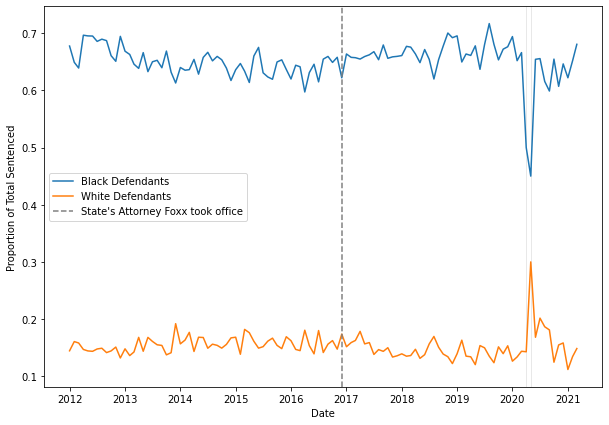

In [25]:
# create the figure
plt.figure(figsize=(10,7)) # Define the size of the graph

ax = plt.gca()  # Get the current axes

# Iterate through each row and shade the background for months with fewer than 100 cases
for index, row in proportions.iterrows():
    if row['total_cases'] < 100:
        ax.axvspan(index, index, color='lightgray', alpha=0.5)  # Shade the background for these months

plt.plot(proportions.index, proportions["proportion_black"], label="Black Defendants")
plt.plot(proportions.index, proportions["proportion_white"], label="White Defendants")
ax.axvline('2016-12-01', color='grey', linestyle='--', label="State's Attorney Foxx took office")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Proportion of Total Sentenced")
plt.show()

**Use mathematical notation to write out each of the proportions using summation notation in a 1-2 sentence writeup describing trends. What seems to be going on in April and May 2020?** \
The proportion of sentenced defendants who are black is equal to: $$P_{\text{Black}} = \frac{\sum \text{is_black_derived}}{\sum \text{CASE_ID}}$$ while the proportion of sentenced defendants who are white is equal to: $$P_{\text{White}} = \frac{\sum \text{is_white_derived}}{\sum \text{CASE_ID}}$$

 
In April and May of 2020, lockdowns were put in place for COVID-19, so sentencing drastically drecreased. Thus, the disparity between black and white incarceration decreased due to a smaller sample size.

## 2.2: Investigating the first type of disparity: probation versus incaceration (10 points)

One type of disparity beyond who arrives at the sentencing stage is whether the defendant receives probation or incaceration.

According to the codebook, incarceration is indicated by `COMMITMENT_TYPE` == "Illinois Department of Corrections"

Recreate the previous plot but where the y axis represents the difference between the following proportions (can be either Black - White or White - Black but make sure to label), adding a smoothed line:

- Percent of black defendants who are incarcerated out of all black defendants that month/year 
- Percent of white defendants who are incarcerated out of all white defendants that month/year 

In a markdown cell after, write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?

In [26]:
# filter for incarcerted 
incarcerated = sc[sc['COMMITMENT_TYPE'] == 'Illinois Department of Corrections']

# aggregate the total cases and separate black and white counts by month and year
proportions = sc.groupby('sentenceym_derived').agg(
    total_cases=('CASE_ID', 'nunique'),
    black_count=('is_black_derived', 'sum'),
    white_count=('is_white_derived', 'sum')
)

# aggregate for incarcerted black and white individuals
incarcerated_proportions = incarcerated.groupby('sentenceym_derived').agg(
    black_incarcerated=('is_black_derived', 'sum'),
    white_incarcerated=('is_white_derived', 'sum')
)

# calculate incarcerated proportions
proportions['proportion_black'] = incarcerated_proportions['black_incarcerated'] / proportions['black_count']
proportions['proportion_white'] = incarcerated_proportions['white_incarcerated'] / proportions['white_count']


# Calculate the difference between proportions (Black - White)
proportions['difference'] = proportions['proportion_black'] - proportions['proportion_white']

# print the table
proportions

,total_cases,black_count,white_count,proportion_black,proportion_white,difference
sentenceym_derived,,,,,,
2012-01-01,1674,1134,242,0.594356,0.359504,0.234852
2012-02-01,1450,941,233,0.601488,0.373391,0.228097
2012-03-01,1612,1030,255,0.584466,0.443137,0.141329
2012-04-01,1436,1000,211,0.598000,0.445498,0.152502
2012-05-01,1545,1074,223,0.539106,0.327354,0.211752
...,...,...,...,...,...,...
2020-11-01,491,298,76,0.409396,0.302632,0.106764
2020-12-01,537,347,85,0.489914,0.376471,0.113443
2021-01-01,447,278,50,0.496403,0.440000,0.056403


<Figure size 720x504 with 0 Axes>

<AxesSubplot:xlabel='sentenceym_derived', ylabel='difference'>

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Difference in Incarceration Rates')

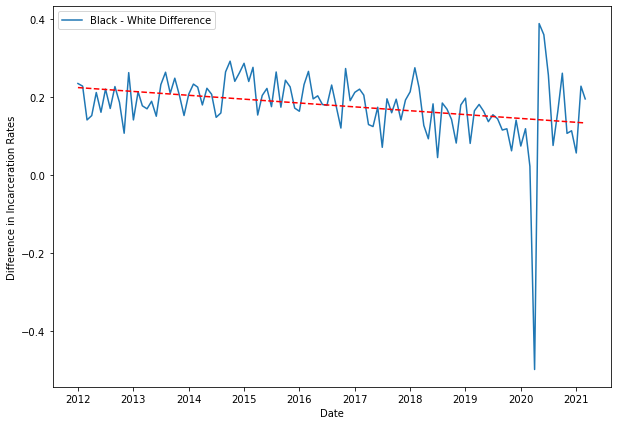

In [27]:
# create the figure
plt.figure(figsize=(10,7)) # Define the size of the graph
sns.lineplot(data=proportions, x=proportions.index, y='difference', label='Black - White Difference')

# Get values for the trend line analysis
x_dates = proportions.index
x_num = dates.date2num(x_dates)

# Calculate a fit line
trend = np.polyfit(x_num, proportions['difference'], 1)
fit = np.poly1d(trend)

# Plot the tend line
x_fit = np.linspace(x_num.min(), x_num.max())
plt.plot(dates.num2date(x_fit), fit(x_fit), "r--")

plt.xlabel('Date')
plt.ylabel('Difference in Incarceration Rates')
plt.legend()


**Write 1-2 sentences on your observations of trends over time. Do gaps seem to be widening or increasing?** \
Gaps appear to narrowing slightly in recent years, though the gap is slightly widening following the height of COVID-19 in 2020. This linear trandline does not account for more nuanced shifts from month to month.

## 2.3: Investigating mechanisms: incaceration rates by charge

Your colleague sees the previous graph and is worried that the gap could be different---either wider or smaller---if you adjust for the fact that prosecutors have discretion in what crimes to charge defendants with. If white defendants are charged with crimes that tend to receive probation rather than incarceration, that could explain some of the gaps.

In the next questions, you'll begin to investigate this.

### 2.3.1: Find the most common offenses (3 points)

First, create a set of 'frequent offenses' that represent (over the entire period) the union of the 10 offenses Black defendant are most likely to be charged with and the 10 offenses white defendants are most likely to be charged with (might be far less than 20 total if there's a lot of overlap in common charges)

Use the `simplified_offense_derived` for this

In [28]:
# Filter the DataFrame to include only Black defendants
black_df = sc[sc['is_black_derived']]

# Filter the DataFrame to include only White defendants
white_df = sc[sc['is_white_derived']]

# Find the top 10 offenses for Black defendants
black_top_offenses = black_df['simplified_offense_derived'].value_counts().head(10).index.tolist()

# Find the top 10 offenses for White defendants
white_top_offenses = white_df['simplified_offense_derived'].value_counts().head(10).index.tolist()

# Calculate the union of the top offenses
frequent_offenses = list(set(black_top_offenses).union(set(white_top_offenses)))
frequent_offenses

['Driving With Suspended Or Revoked License',
 'Theft',
 'DUI',
 'Battery',
 'Vehicle-related',
 'Residential Burglary',
 'Narcotics',
 'Retail Theft',
 'UUW - Unlawful Use of Weapon',
 'Other Offense',
 'Robbery',
 'Burglary']

### 2.3.2: Look at incarceration rates (again just whether incarcerated) by race and offense type for these top offenses (3 points)

Print a wide-format version of the resulting table (so each row is an offense type, one col is black incarceration rate for that offense type; another is the white incarceration rate) and interpret. Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?


In [29]:
# create a boolean indicator indicating incarceration
sc["incarcerated_derived"] = [True if x == "Illinois Department of Corrections" else False for x in sc["COMMITMENT_TYPE"]]

# subset the dataframe to only include cases with top offenses
top_offenses = sc[sc['simplified_offense_derived'].isin(frequent_offenses)]

# create a pivot table
pivot_table = pd.pivot_table(top_offenses, 
                             values='incarcerated_derived', 
                             index='simplified_offense_derived', 
                             columns=['is_black_derived', 'is_white_derived'], 
                             aggfunc='mean', fill_value=0)

# Rename the columns for clarity
pivot_table.columns = ['Other Incarceration Rate', 'White Incarceration Rate', 'Black Incarceration Rate']

pivot_table

,Other Incarceration Rate,White Incarceration Rate,Black Incarceration Rate
simplified_offense_derived,,,
Battery,0.368066,0.275552,0.509032
Burglary,0.467345,0.535763,0.661927
DUI,0.205762,0.341855,0.404997
Driving With Suspended Or Revoked License,0.404629,0.496552,0.582193
Narcotics,0.339537,0.242535,0.537876
Other Offense,0.219807,0.230228,0.340580
Residential Burglary,0.648766,0.654114,0.717791
Retail Theft,0.434286,0.449582,0.595713
Robbery,0.628235,0.589286,0.650341


**Which offenses show the largest disparities in judges being less likely to sentence White defendants to incarceration/more likely to offer those defendants probation?** \
Battery, Narcotics, and Retail Theft offenses display the largest disparities in white vs black incarceration rates.

### 2.3.3: Examine whether this changes pre and post change to charging threshold for retail theft (13 points)

One important question is not only whether there are disparities by offense type but also whether these disparities are changing over time.

The SAO, for instance, announced in December of 2016 that they would no longer default to charging retail thefts of under \$1,000 as felonies. This change might have (1) decreased disparities or (2) increased disparities, depending on the correlation between race/ethnicity and magnitude of goods stolen: [news coverage](https://www.dnainfo.com/chicago/20161215/little-village/kim-foxx-raises-bar-for-retail-theft-felonies/). 

Focusing on `simplified_offense_derived` == "Retail theft." Using a function and/or loop (Dec. 2016 is always excluded as a transition month):

- Compare Black-White disparities before and after the change using a two-month bandwidth (so pre is October and November 2016; post is January and February 2017)

- Compare Black-White disparities before and after the change using a four-month bandwidth (so pre is August- November 2016; post is January - April 2017)

- Compare Black-White disparities using an eight-month bandwidth

- Compare Black-White disparities using a twelve-month bandwidth


------------------ 

- Print a table with the results (any organization is fine as long as it's clear)  

- Create a bar chart where the x axis represents different bandwidths (2, 4, etc); the y axis the size of the Black-White gap in whether the defendant receives incarceration, and for each of the x axis points, you have one shaded bar representing "before" the change, another representing "after" the change (make sure that before is ordered before after and the bandwidths are from smallest to largest)

*Note*: for each of the bandwidths include dates the entire month (e.g., for the first, include not only 02-01-2017 but everything up through 02-28-2017; easiest way is for the subsetting to use the rounded `sentenceym_derived`). Also make sure to only include white or black defendants.


**Extra credit**: because the bandwidths have different sample sizes, a better viz incorporates measures of uncertainty. Add standard errors to the estimates using the formula: $(\dfrac{p(1-p)}{n})^{0.5}$ where $p$ is the gap and $N$ is the number of cases in each bandwidth period 


In [30]:
# subset the dataframe to only include cases of retail theft
retail_theft = sc[sc["simplified_offense_derived"] == "Retail Theft"]

# create a function that compares disparities in incarceration rates over a period of time
def retail_theft_disparity(pre_start, post_end):
    # format dates
    date_format = '%Y-%m-%d'
    pre_start_date = datetime.strptime(pre_start, date_format)
    pre_end_date = datetime.strptime("2016-11-30", date_format)
    post_start_date = datetime.strptime("2017-01-01", date_format)
    post_end_date = datetime.strptime(post_end, date_format)
    
    # subset dataframes by date ranges
    pre = retail_theft[(retail_theft["sentenceym_derived"] >= pre_start_date) & (retail_theft["sentenceym_derived"] <= pre_end_date)]
    post = retail_theft[(retail_theft["sentenceym_derived"] >= post_start_date) & (retail_theft["sentenceym_derived"] <= post_end_date)]
    
    # group by race and calculate incarceration rates
    pre_disp = pre.groupby(["is_black_derived", "is_white_derived"])["incarcerated_derived"].agg("mean")
    post_disp = post.groupby(["is_black_derived", "is_white_derived"])["incarcerated_derived"].agg("mean")
    
    # report results
    print("Pre-Announcement\nWhite Incarceration Rate: %f\nBlack Incarceration Rate: %f\nDifference: %f\n" %(pre_disp[False][True], pre_disp[True][False], pre_disp[True][False] - pre_disp[False][True]))
    print("Post-Announcement\nWhite Incarceration Rate: %f\nBlack Incarceration Rate: %f\nDifference: %f" %(post_disp[False][True], post_disp[True][False], post_disp[True][False] - post_disp[False][True]))
    

In [31]:
# Two Month Bandwidth
retail_theft_disparity("2016-10-01", "2017-02-28")

Pre-Announcement
White Incarceration Rate: 0.538462
Black Incarceration Rate: 0.626374
Difference: 0.087912

Post-Announcement
White Incarceration Rate: 0.217391
Black Incarceration Rate: 0.372340
Difference: 0.154949


In [32]:
# Four Month Bandwidth
retail_theft_disparity("2016-08-01", "2017-04-30")

Pre-Announcement
White Incarceration Rate: 0.476923
Black Incarceration Rate: 0.558511
Difference: 0.081588

Post-Announcement
White Incarceration Rate: 0.330357
Black Incarceration Rate: 0.411972
Difference: 0.081615


In [33]:
# Eight Month Bandwidth
retail_theft_disparity("2016-04-01", "2017-06-30")

Pre-Announcement
White Incarceration Rate: 0.436090
Black Incarceration Rate: 0.568990
Difference: 0.132900

Post-Announcement
White Incarceration Rate: 0.430380
Black Incarceration Rate: 0.472826
Difference: 0.042446


In [34]:
# Twelve Month Bandwidth
retail_theft_disparity("2015-12-01", "2017-12-31")

Pre-Announcement
White Incarceration Rate: 0.419271
Black Incarceration Rate: 0.580889
Difference: 0.161618

Post-Announcement
White Incarceration Rate: 0.446009
Black Incarceration Rate: 0.510714
Difference: 0.064705


### 2.3.3.1: Interpret the results (2 points)

Write a two-sentence interpretation of the results. What might this show about how people on both sides of the issue---those who argued that the retail theft policy change would narrow disparities; those who argued that the change may widen disparities--could support their claims? 

The results indicate that the retail theft policy change has narrowed disparities over time, though the disparity actually widened within the first two months. People on both sides of the issue could support their claims based on what date range they look at.